# **521H0505 - Nguyễn Ngọc Minh**
#**521H0503 - Trương Huỳnh Đăng Khoa**
# **521H0324 - Nguyễn Văn Trường**

In [ ]:
# !pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('boxoffice.csv',
				encoding='latin-1')
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [ ]:
df.shape

(2694, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   object
 2   world_revenue     2694 non-null   object
 3   distributor       2694 non-null   object
 4   opening_revenue   2390 non-null   object
 5   opening_theaters  2383 non-null   object
 6   budget            397 non-null    object
 7   MPAA              1225 non-null   object
 8   genres            2655 non-null   object
 9   release_days      2694 non-null   object
dtypes: object(10)
memory usage: 210.6+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
title,2694,2468,A Beautiful Planet,3
domestic_revenue,2694,2495,"$11,272,008",3
world_revenue,2694,2501,"$25,681,505",3
distributor,2694,248,Fathom Events,292
opening_revenue,2390,2176,"$4,696",3
opening_theaters,2383,732,1,503
budget,397,124,"$40,000,000",14
MPAA,1225,8,R,568
genres,2655,567,Documentary,351
release_days,2694,457,347,35


In [ ]:
# We will be predicting only
# domestic_revenue in this article.

print(df.columns)
print(df.head())  # Display the first few rows to inspect column names visually

column_exists = all(col in df.columns for col in ['world_revenue', 'opening_revenue'])
print(column_exists)



Index(['title', 'domestic_revenue', 'world_revenue', 'distributor',
       'opening_revenue', 'opening_theaters', 'budget', 'MPAA', 'genres',
       'release_days'],
      dtype='object')
                                     title domestic_revenue   world_revenue  \
0  Star Wars: Episode VIII - The Last Jedi     $620,181,382  $1,332,539,889   
1                  The Fate of the Furious     $226,008,385  $1,236,005,118   
2                             Wonder Woman     $412,563,408    $821,847,012   
3           Guardians of the Galaxy Vol. 2     $389,813,101    $863,756,051   
4                     Beauty and the Beast     $504,014,165  $1,263,521,126   

                           distributor opening_revenue opening_theaters  \
0  Walt Disney Studios Motion Pictures    $220,009,584            4,232   
1                   Universal Pictures     $98,786,705            4,310   
2                         Warner Bros.    $103,251,471            4,165   
3  Walt Disney Studios Motion Picture

In [ ]:
# df['opening_revenue'] = df['opening_revenue'].replace('[\$,]', '', regex=True)
# df['world_revenue'] = df['world_revenue'].replace('[\$,]', '', regex=True)


# df['opening_revenue'] = pd.to_numeric(df['opening_revenue'], errors='coerce')
# df['world_revenue'] = pd.to_numeric(df['world_revenue'], errors='coerce')
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [ ]:
df.isnull().sum() * 100 / df.shape[0]

title                0.000000
domestic_revenue     0.000000
world_revenue        0.000000
distributor          0.000000
opening_revenue     11.284336
opening_theaters    11.544172
budget              85.263549
MPAA                54.528582
genres               1.447661
release_days         0.000000
dtype: float64

In [ ]:
df['opening_theaters'] = pd.to_numeric(df['opening_theaters'], errors='coerce')
df['release_days'] = pd.to_numeric(df['release_days'], errors='coerce')



In [ ]:
# Handling the null value columns
df.drop('budget', axis=1, inplace=True)

for col in ['MPAA', 'genres']:
	df[col] = df[col].fillna(df[col].mode()[0])

df.dropna(inplace=True)

df.isnull().sum().sum()


0

In [ ]:
df.isnull().sum() * 100 / df.shape[0]

title               0.0
domestic_revenue    0.0
world_revenue       0.0
distributor         0.0
opening_revenue     0.0
opening_theaters    0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [ ]:
# df['domestic_revenue'] = df['domestic_revenue'].str[1:]
# Convert columns to string type before applying string operations
for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(',', '')

    # Apply string operations only on non-null string values
    temp = ~df[col].isnull()
    df.loc[temp, col] = df.loc[temp, col].str[1:]

    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')



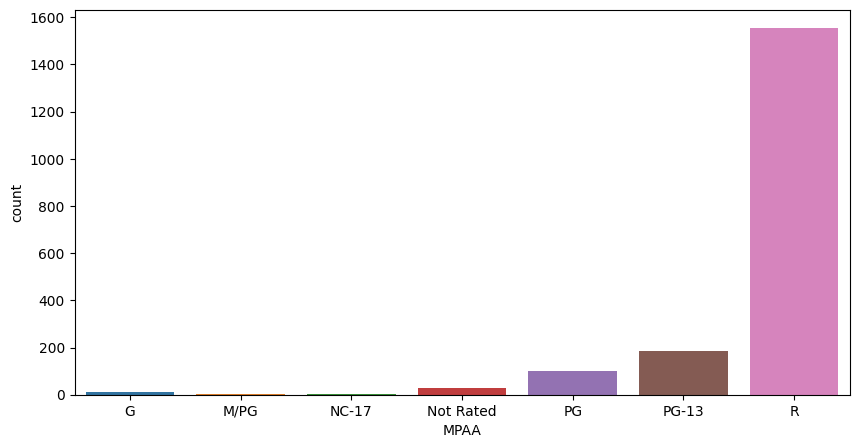

0


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# Convert 'MPAA' column to categorical dtype
df['MPAA'] = df['MPAA'].astype('category')

# Plot the count of each category in 'MPAA'
plt.figure(figsize=(10, 5))
sb.countplot(data=df, x='MPAA')
plt.show()

# Check for null values in 'MPAA' column
print(df['MPAA'].isnull().sum())


In [ ]:
# Convert 'domestic_revenue' to numeric, coercing errors
df['domestic_revenue'] = pd.to_numeric(df['domestic_revenue'], errors='coerce')

# Group by 'MPAA' and calculate the mean of 'domestic_revenue'
mean_domestic_revenue_by_MPAA = df.groupby('MPAA')['domestic_revenue'].mean()


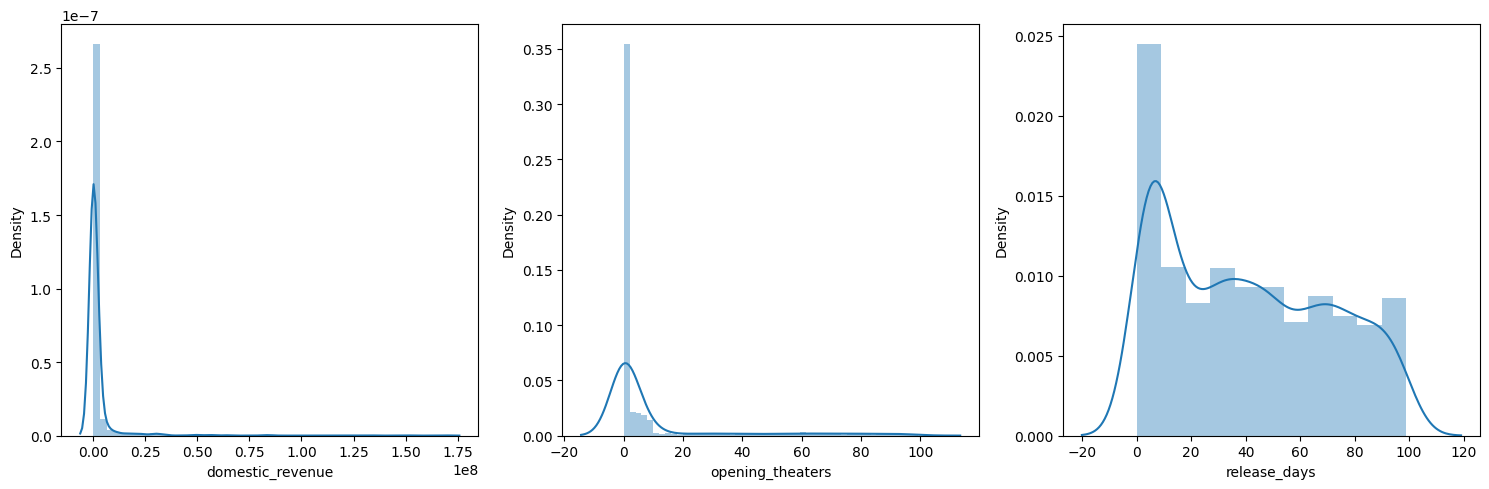

In [ ]:
plt.subplots(figsize=(15, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
	plt.subplot(1, 3, i+1)
	sb.distplot(df[col])
plt.tight_layout()
plt.show()


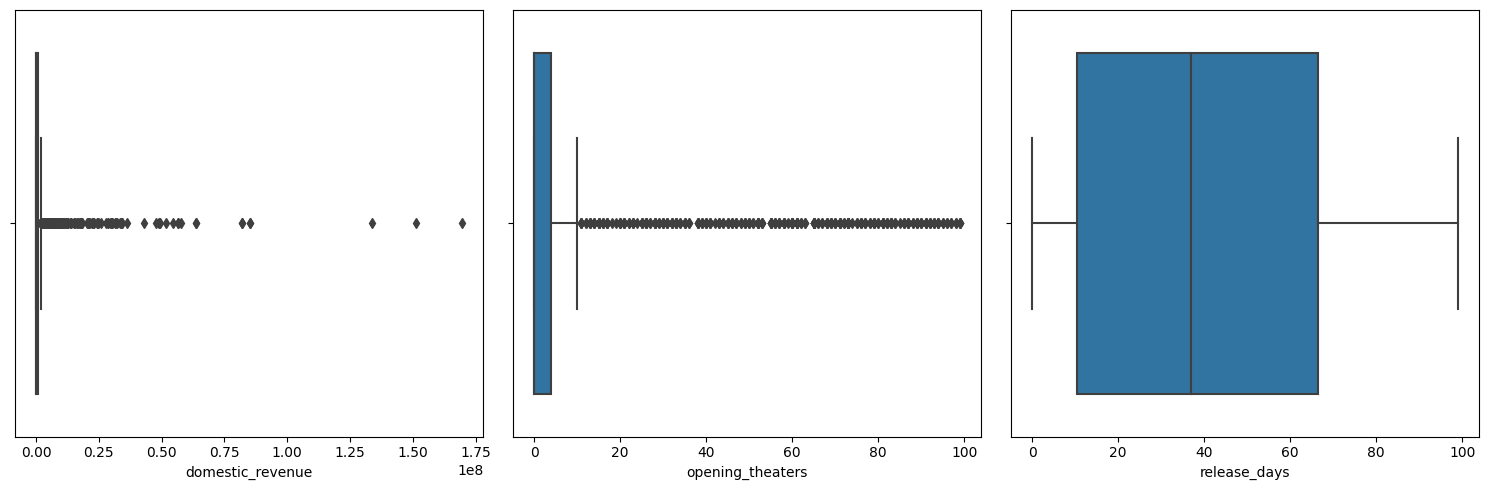

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming 'features' contains valid column names present in your DataFrame 'df'
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.boxplot(data=df, x=col)  # Ensure 'col' exists in 'df'
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

for col in features:
    df[col] = df[col].apply(lambda x: np.log10(float(x)) if (isinstance(x, (int, float)) and x > 0) else np.nan)


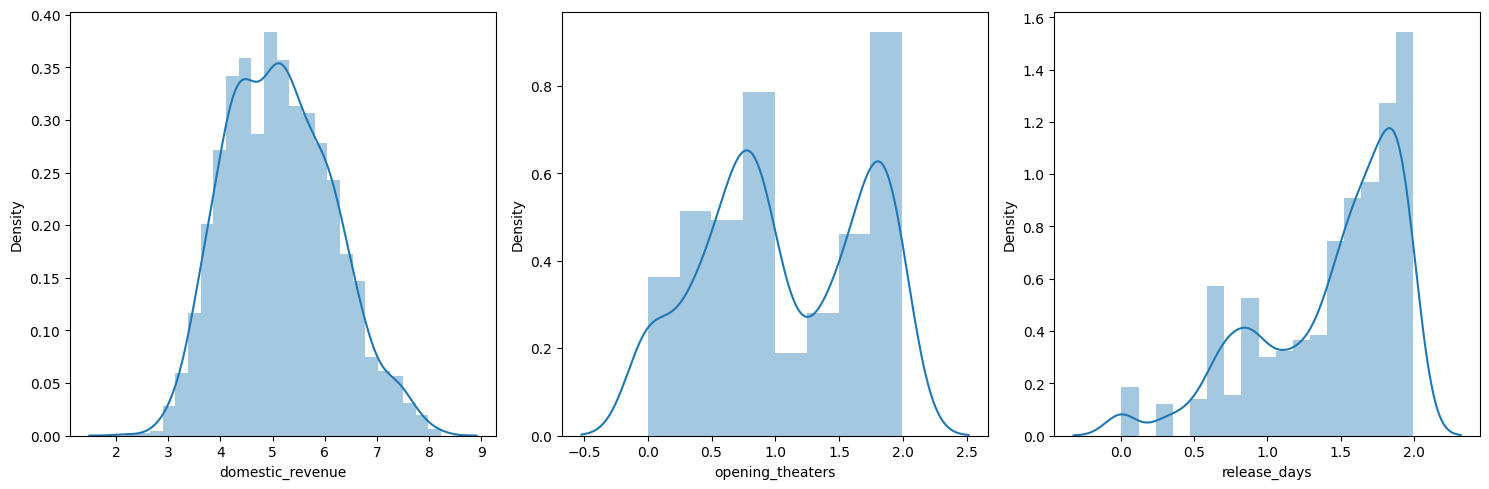

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
	plt.subplot(1, 3, i+1)
	sb.distplot(df[col])
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

Index(['title', 'domestic_revenue', 'world_revenue', 'distributor',
       'opening_revenue', 'opening_theaters', 'MPAA', 'genres',
       'release_days'],
      dtype='object')


In [ ]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(df['genres'])

# Retrieve feature names after fitting the vectorizer
genres = vectorizer.get_feature_names_out()

# Transform the features into an array
features_array = features.toarray()

# Create a DataFrame with the features
features_df = pd.DataFrame(features_array, columns=genres)

# Concatenate the original DataFrame 'df' with the new features DataFrame
df = pd.concat([df, features_df], axis=1)

# Drop the 'genres' column
df.drop('genres', axis=1, inplace=True)

In [ ]:
removed = 0
for col in df.loc[:, 'action':'western'].columns:

	# Removing columns having more
	# than 95% of the values as zero.
	if (df[col] == 0).mean() > 0.95:
		removed += 1
		df.drop(col, axis=1, inplace=True)

print(removed)
print(df.shape)


0
(2308, 37)


In [ ]:
df['distributor'] = df['distributor'].astype('category')

for col in ['distributor', 'MPAA']:
	le = LabelEncoder()
	df[col] = le.fit_transform(df[col])


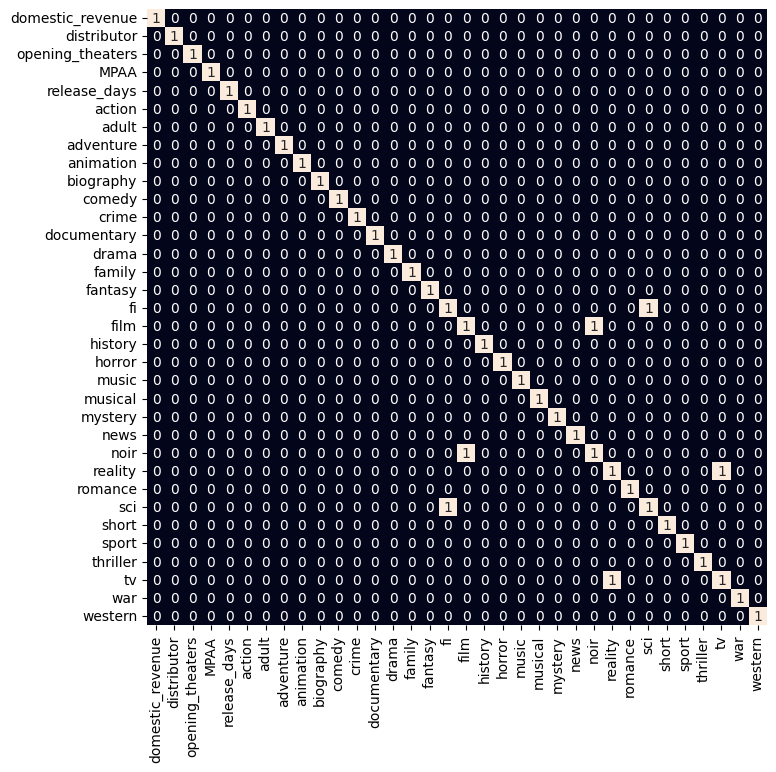

In [ ]:
# Exclude non-numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 8))
sb.heatmap(numeric_df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [ ]:
features = df.drop(['title', 'domestic_revenue', 'fi'], axis=1)
target = df['domestic_revenue'].values

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=42)
X_train.shape, X_val.shape, X_train



((1846, 34),
 (462, 34),
      world_revenue  distributor opening_revenue  opening_theaters  MPAA  \
 838        $20,039          112          $3,517               NaN     6   
 2334   $46,710,283           78        $194,777               NaN     6   
 1574           NaN          217             NaN               NaN     7   
 460        $83,558          119         $12,309               NaN     6   
 2465    $7,214,806            2        $111,200               NaN     6   
 ...            ...          ...             ...               ...   ...   
 2171      $900,451           72        $386,612          1.740363     6   
 1365      $115,103          125         $25,208               NaN     6   
 1402       $21,031          106          $5,204               NaN     6   
 1619      $194,601          184         $19,586               NaN     6   
 1092      $516,130           72        $263,582          1.000000     4   
 
       release_days  action  adult  adventure  animation  ...

In [ ]:
Y_train.flatten().shape

(1846,)

In [ ]:
# Normalizing the features for stable and fast training.

# Assuming 'col_to_convert' is the column containing monetary values
X_train['world_revenue'] = X_train['world_revenue'].replace('[\$,]', '', regex=True).astype(float)
X_val['world_revenue'] = X_val['world_revenue'].replace('[\$,]', '', regex=True).astype(float)



# Assuming 'col_to_convert' is the column containing monetary values
X_train['opening_revenue'] = X_train['opening_revenue'].replace('[\$,]', '', regex=True).astype(float)
X_val['opening_revenue'] = X_val['opening_revenue'].replace('[\$,]', '', regex=True).astype(float)



In [ ]:
numeric_cols = X_train.select_dtypes(np.number).columns


col_update = X_train[numeric_cols].apply(lambda col: col.fillna(col.mean()))
X_train[numeric_cols] = col_update


numeric_cols_X_val = X_val.select_dtypes(np.number).columns
col_update_X_val = X_val[numeric_cols_X_val].apply(lambda col: col.fillna(col.mean()))
X_val[numeric_cols_X_val] = col_update_X_val


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1846 entries, 838 to 1092
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   world_revenue     1846 non-null   float64
 1   distributor       1846 non-null   int64  
 2   opening_revenue   1846 non-null   float64
 3   opening_theaters  1846 non-null   float64
 4   MPAA              1846 non-null   int64  
 5   release_days      1846 non-null   float64
 6   action            1846 non-null   float64
 7   adult             1846 non-null   float64
 8   adventure         1846 non-null   float64
 9   animation         1846 non-null   float64
 10  biography         1846 non-null   float64
 11  comedy            1846 non-null   float64
 12  crime             1846 non-null   float64
 13  documentary       1846 non-null   float64
 14  drama             1846 non-null   float64
 15  family            1846 non-null   float64
 16  fantasy           1846 non-null   float6

In [ ]:
# Normalizing the features for stable and fast training.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Xử lý giá trị NaN, infinity trong Y_train
Y_train[np.isinf(Y_train)] = np.nan

# Sử dụng SimpleImputer để điền giá trị NaN bằng mean của cột (hoặc median, mode tùy ý)
imputer = SimpleImputer(strategy='mean')
Y_train = imputer.fit_transform(Y_train.reshape(-1, 1))

# Kiểm tra và xử lý giá trị cực lớn trong Y_train
max_allowed_value = 1e12  # Giá trị tối đa cho phép
Y_train[Y_train > max_allowed_value] = max_allowed_value  # Thay thế các giá trị vượt quá giới hạn

# Tiếp tục huấn luyện mô hình XGBoost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

model_xgb = XGBRegressor()
model_xgb.fit(X_train, Y_train)

train_preds = model_xgb.predict(X_train)

print('Training Error : ', mae(Y_train, train_preds))

# Xử lý dữ liệu Y_val tương tự như Y_train
Y_val[np.isinf(Y_val)] = np.nan
Y_val = imputer.transform(Y_val.reshape(-1, 1))

Y_val[Y_val > max_allowed_value] = max_allowed_value

# Đánh giá mô hình trên dữ liệu validation (Y_val)
val_preds = model_xgb.predict(X_val)
print(val_preds.shape)
print('Validation Error With MAE : ', mae(Y_val, val_preds))
print('Validation Error With MSE : ', mse(Y_val, val_preds))



Training Error :  0.02267192903387726
(462,)
Validation Error With MAE :  0.2420873938469516
Validation Error With MSE :  0.11153374102329877


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [ ]:
# Linear Regression
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, Y_train)

pred_linear_regression = model_linear_regression.predict(X_val)
print(pred_linear_regression.shape)
print(mse(Y_val, pred_linear_regression))
print(mae(Y_val, pred_linear_regression))


(462, 1)
1.1269692898307997
0.6214646543437339


In [ ]:
# Random Forest
model_randomforest = RandomForestRegressor()
model_randomforest.fit(X_train, Y_train)

pred_randomforest = model_randomforest.predict(X_val)
print(pred_randomforest.shape)
print(mse(Y_val, pred_randomforest.reshape(-1, 1)))
print(mae(Y_val, pred_randomforest))

(462,)
0.08144161481175449
0.18324829607586768


In [ ]:
# Averaging Method in Ensemble Learning
pred_average = (val_preds.reshape(-1, 1) + pred_linear_regression + pred_randomforest.reshape(-1, 1))/3.0

print(mse(Y_val, pred_average))
print(mae(Y_val, pred_average))

0.2101992594388076
0.2869793573836084


In [ ]:
# Stacking
from sklearn.ensemble import StackingRegressor

estimators = [('lr', model_linear_regression), ('rf', model_randomforest), ('xgb', model_xgb)]
final_estimator = LinearRegression()
model_stacking = StackingRegressor(estimators = estimators, final_estimator = final_estimator)
model_stacking.fit(X_train, Y_train).score(X_val, Y_val)



0.8979688540338099

In [ ]:
pred_stacking = model_stacking.predict(X_val)
pred_stacking = pred_stacking.reshape(-1, 1)

print(mse(Y_val, pred_stacking))

0.08456180685579423


Ý 4 áp dụng cho ý 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# FNN
model_fnn= Sequential([
    Dense(128, activation = 'relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model_fnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))

Epoch 1/50
47/47 [==============================] - 1s 7ms/step - loss: 11.4768 - val_loss: 3.9203
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 3.7161 - val_loss: 2.6199
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 2.5744 - val_loss: 2.1202
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 2.0647 - val_loss: 1.8464
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 1.6591 - val_loss: 1.6039
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 1.3644 - val_loss: 1.3111
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 1.1073 - val_loss: 1.1302
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.8845 - val_loss: 0.9554
Epoch 9/50
47/47 [==============================] - 0s 3ms/step - loss: 0.7318 - val_loss: 0.8459
Epoch 10/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6898 - val_loss: 0.7274
Epoch 11/50
47/47 

In [ ]:
# Áp dụng các kỹ thuật tránh Overfiting - Dropout cho FFN:

from keras.layers import Dropout

model_fnn= Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])
model_fnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))

Epoch 1/50
47/47 [==============================] - 2s 16ms/step - loss: 13.8898 - val_loss: 4.0848
Epoch 2/50
47/47 [==============================] - 0s 9ms/step - loss: 7.0689 - val_loss: 3.3580
Epoch 3/50
47/47 [==============================] - 0s 8ms/step - loss: 6.7904 - val_loss: 3.0988
Epoch 4/50
47/47 [==============================] - 1s 12ms/step - loss: 4.7247 - val_loss: 2.4962
Epoch 5/50
47/47 [==============================] - 1s 11ms/step - loss: 4.4586 - val_loss: 2.2741
Epoch 6/50
47/47 [==============================] - 0s 8ms/step - loss: 4.3619 - val_loss: 2.1409
Epoch 7/50
47/47 [==============================] - 1s 13ms/step - loss: 3.5768 - val_loss: 1.9283
Epoch 8/50
47/47 [==============================] - 0s 10ms/step - loss: 3.4213 - val_loss: 1.7744
Epoch 9/50
47/47 [==============================] - 1s 11ms/step - loss: 3.2152 - val_loss: 1.5549
Epoch 10/50
47/47 [==============================] - 1s 16ms/step - loss: 2.9209 - val_loss: 1.5653
Epoch 11/50

In [ ]:
# Áp dụng các kỹ thuật tránh Overfiting - Regularization cho FFN:
from keras import regularizers

model_fnn= Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1)
])
model_fnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))

Epoch 1/50
47/47 [==============================] - 1s 9ms/step - loss: 12.1312 - val_loss: 5.3656
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 5.0621 - val_loss: 4.0727
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 3.7145 - val_loss: 3.3404
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 3.1458 - val_loss: 2.9897
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 2.7099 - val_loss: 2.6016
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 2.3621 - val_loss: 2.3222
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 2.0790 - val_loss: 2.1322
Epoch 8/50
47/47 [==============================] - 0s 5ms/step - loss: 1.8703 - val_loss: 1.8905
Epoch 9/50
47/47 [==============================] - 0s 5ms/step - loss: 1.6552 - val_loss: 1.7377
Epoch 10/50
47/47 [==============================] - 0s 5ms/step - loss: 1.5368 - val_loss: 1.6072
Epoch 11/50
47/47 

In [ ]:
# Áp dụng các kỹ thuật tránh Overfiting - Early Stopping cho FFN:
from keras.callbacks import EarlyStopping

model_fnn.compile(optimizer='adam', loss='mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))


Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.4782 - val_loss: 0.6032
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4791 - val_loss: 0.6051
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4530 - val_loss: 0.5965
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4347 - val_loss: 0.5938
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4155 - val_loss: 0.5661
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4130 - val_loss: 0.5669
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4261 - val_loss: 0.5586
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4054 - val_loss: 0.5596
Epoch 9/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4019 - val_loss: 0.5252
Epoch 10/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3817 - val_loss: 0.5218
Epoch 11/50
47/47 [

In [ ]:
# RNN

X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

model_rnn = Sequential([
    LSTM(50, activation = 'relu', input_shape = (X_train.shape[1], 1)),
    Dense(1)

])

model_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_rnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)
pred_rnn = model_rnn.predict(X_val)
print(mse(Y_val, pred_rnn))

Epoch 1/50
47/47 [==============================] - 2s 22ms/step - loss: 20.9248 - val_loss: 18.3939
Epoch 2/50
47/47 [==============================] - 1s 17ms/step - loss: 10.5278 - val_loss: 1.9643
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 1.3835 - val_loss: 1.0637
Epoch 4/50
47/47 [==============================] - 1s 16ms/step - loss: 1.0513 - val_loss: 0.9564
Epoch 5/50
47/47 [==============================] - 1s 17ms/step - loss: 0.9639 - val_loss: 0.9022
Epoch 6/50
47/47 [==============================] - 1s 27ms/step - loss: 0.9010 - val_loss: 0.8632
Epoch 7/50
47/47 [==============================] - 1s 25ms/step - loss: 0.8642 - val_loss: 0.8397
Epoch 8/50
47/47 [==============================] - 1s 26ms/step - loss: 0.8492 - val_loss: 0.8136
Epoch 9/50
47/47 [==============================] - 1s 20ms/step - loss: 0.8203 - val_loss: 0.8646
Epoch 10/50
47/47 [==============================] - 1s 17ms/step - loss: 0.8263 - val_loss: 0.7812
Epoch 

In [ ]:
# Áp dụng các kỹ thuật tránh Overfiting - Dropout cho RNN:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

from keras.layers import Dropout

model_rnn = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),  #(có thể điều chỉnh tỷ lệ này)
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2)
pred_rnn = model_rnn.predict(X_val_reshaped)
print(mse(Y_val, pred_rnn))



Epoch 1/50
47/47 [==============================] - 4s 35ms/step - loss: 4706.2344 - val_loss: 25.5921
Epoch 2/50
47/47 [==============================] - 1s 18ms/step - loss: 25.5919 - val_loss: 25.3898
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 25.2815 - val_loss: 25.0328
Epoch 4/50
47/47 [==============================] - 1s 17ms/step - loss: 24.9070 - val_loss: 24.6436
Epoch 5/50
47/47 [==============================] - 1s 18ms/step - loss: 24.4984 - val_loss: 24.2358
Epoch 6/50
47/47 [==============================] - 1s 19ms/step - loss: 24.1154 - val_loss: 23.8142
Epoch 7/50
47/47 [==============================] - 1s 17ms/step - loss: 23.6599 - val_loss: 23.3845
Epoch 8/50
47/47 [==============================] - 1s 17ms/step - loss: 23.2211 - val_loss: 22.9484
Epoch 9/50
47/47 [==============================] - 1s 18ms/step - loss: 22.8119 - val_loss: 22.5106
Epoch 10/50
47/47 [==============================] - 1s 17ms/step - loss: 22.3537 - val_l

In [ ]:
# Áp dụng các kỹ thuật tránh Overfiting - Regularization cho RNN:
from keras.regularizers import l2

model_rnn = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1, kernel_regularizer=l2(0.01))  # Thêm L2 regularization với hệ số là 0.01 (có thể điều chỉnh hệ số này)
])

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2)
pred_rnn = model_rnn.predict(X_val_reshaped)
print(mse(Y_val, pred_rnn))


Epoch 1/50
47/47 [==============================] - 3s 23ms/step - loss: 1794084.3750 - val_loss: 23.6153
Epoch 2/50
47/47 [==============================] - 1s 17ms/step - loss: 6690.7173 - val_loss: 23.9755
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 11441.5566 - val_loss: 23.9902
Epoch 4/50
47/47 [==============================] - 1s 18ms/step - loss: 7674.5679 - val_loss: 24.0008
Epoch 5/50
47/47 [==============================] - 1s 19ms/step - loss: 713.6565 - val_loss: 23.9775
Epoch 6/50
47/47 [==============================] - 1s 18ms/step - loss: 180.7893 - val_loss: 23.9562
Epoch 7/50
47/47 [==============================] - 1s 24ms/step - loss: 25.0814 - val_loss: 23.8957
Epoch 8/50
47/47 [==============================] - 1s 27ms/step - loss: 24.9715 - val_loss: 23.8262
Epoch 9/50
47/47 [==============================] - 1s 27ms/step - loss: 24.8946 - val_loss: 23.7548
Epoch 10/50
47/47 [==============================] - 1s 23ms/step - loss: 24.

In [ ]:
# Áp dụng các kỹ thuật tránh Overfiting - Early Stopping cho RNN:
from keras.callbacks import EarlyStopping

model_rnn = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Tạo callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình với early stopping
model_rnn.fit(X_train_reshaped, Y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Dự đoán và đánh giá mô hình
pred_rnn = model_rnn.predict(X_val_reshaped)
print(mse(Y_val, pred_rnn))


Epoch 1/50
47/47 [==============================] - 3s 35ms/step - loss: 4468.7251 - val_loss: 24.6653
Epoch 2/50
47/47 [==============================] - 1s 27ms/step - loss: 24.9586 - val_loss: 24.8574
Epoch 3/50
47/47 [==============================] - 1s 21ms/step - loss: 24.7784 - val_loss: 24.5583
Epoch 4/50
47/47 [==============================] - 1s 17ms/step - loss: 24.4609 - val_loss: 24.2255
Epoch 5/50
47/47 [==============================] - 1s 17ms/step - loss: 24.1168 - val_loss: 23.8710
Epoch 6/50
47/47 [==============================] - 1s 18ms/step - loss: 23.7547 - val_loss: 23.5030
Epoch 7/50
47/47 [==============================] - 1s 17ms/step - loss: 23.3807 - val_loss: 23.1224
Epoch 8/50
47/47 [==============================] - 1s 17ms/step - loss: 22.9980 - val_loss: 22.7380
Epoch 9/50
47/47 [==============================] - 1s 16ms/step - loss: 22.6098 - val_loss: 22.3477
Epoch 10/50
47/47 [==============================] - 1s 17ms/step - loss: 22.2178 - val_l

Standardize features and targets for cross-validation

In [ ]:
# Assuming 'col_to_convert' is the column containing monetary values
features['world_revenue'] = features['world_revenue'].replace('[\$,]', '', regex=True).astype(float)

# Assuming 'col_to_convert' is the column containing monetary values
features['opening_revenue'] = features['opening_revenue'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
target.flatten().shape

(2308,)

In [ ]:
numeric_cols = features.select_dtypes(np.number).columns


col_update = features[numeric_cols].apply(lambda col: col.fillna(col.mean()))
features[numeric_cols] = col_update



In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
# Xử lý giá trị NaN, infinity trong Y_train
target[np.isinf(target)] = np.nan

# Sử dụng SimpleImputer để điền giá trị NaN bằng mean của cột (hoặc median, mode tùy ý)
imputer = SimpleImputer(strategy='mean')
target = imputer.fit_transform(target.reshape(-1, 1))

# Kiểm tra và xử lý giá trị cực lớn trong Y_train
max_allowed_value = 1e12  # Giá trị tối đa cho phép
target[target > max_allowed_value] = max_allowed_value  # Thay thế các giá trị vượt quá giới hạn

# **Ý 4 áp dụng cho ý 2**

#Cross-Validation
Kỹ thuật giúp đánh giá mô hình trên nhiều tập dữ liệu khác nhau (chia tập train thành nhiều phần)

In [ ]:
# Chia dữ liệu thành 5 fold cho cross-validation
# Sử dụng KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_randomforest_cv = RandomForestRegressor()

# Đánh giá mô hình sử dụng cross-validation
rf_scores = cross_val_score(model_randomforest_cv, features, target, scoring='neg_mean_squared_error', cv=kf)

# In kết quả
print("Random forest with Cross-Validation MSE: {:.4f} (+/- {:.4f})".format(-rf_scores.mean(), rf_scores.std()))


Random forest with Cross-Validation MSE: 0.0787 (+/- 0.0103)


#Dropout trong mô hình Gradient Boosting
 Trong gradient boosting, tham số subsample quy định tỷ lệ mẫu được sử dụng để xây dựng mỗi cây quyết định. Nếu subsample < 1.0, mỗi cây sẽ được xây dựng dựa trên một phần ngẫu nhiên của dữ liệu. Điều này có thể giúp giảm overfitting bằng cách sử dụng một phần nhỏ của dữ liệu để xây dựng mỗi cây thay vì sử dụng toàn bộ tập dữ liệu.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Gradient Boosting with Dropout
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, subsample=0.8)
gb_model.fit(X_train, Y_train)

# Evaluate the model on the test set
gb_test_pred = gb_model.predict(X_val)
gb_test_mse = mean_squared_error(Y_val, gb_test_pred)

print("Gradient Boosting Test MSE:", gb_test_mse)


Gradient Boosting Test MSE: 0.11383797651051293


#Ridge Regression with Regularization
Ridge Regression sử dụng tham số alpha để kiểm soát mức độ regularization. Khi alpha tăng lên, mô hình trở nên đơn giản hóa hơn, giúp kiểm soát overfitting. Việc thử nghiệm và điều chỉnh giá trị của alpha sẽ ảnh hưởng đến mức độ regularization.

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression with Regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

# Evaluate the model on the test set
ridge_test_pred = ridge_model.predict(X_val)
ridge_test_mse = mean_squared_error(Y_val, ridge_test_pred)

print("Ridge Regression Test MSE:", ridge_test_mse)


Ridge Regression Test MSE: 0.5805130354443159


#Gradient Boosting with Early Stopping
Trong gradient boosting, n_iter_no_change và tol được sử dụng để thiết lập điều kiện dừng sớm. Nếu sau một số lần lặp không có sự cải thiện đủ đáng kể (được kiểm tra bằng tol), quá trình đào tạo sẽ dừng sớm. Điều này giúp ngăn chặn mô hình từ việc tiếp tục học trên dữ liệu đào tạo khi nó không còn mang lại cải thiện đáng kể trên tập validation, giảm nguy cơ overfitting.

In [ ]:
# Gradient Boosting with Early Stopping
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, validation_fraction=0.1, n_iter_no_change=5, tol=0.01)
gb_model.fit(X_train, Y_train)

# Evaluate the model on the test set
gb_test_pred = gb_model.predict(X_val)
gb_test_mse = mean_squared_error(Y_val, gb_test_pred)

print("Gradient Boosting Test MSE:", gb_test_mse)


Gradient Boosting Test MSE: 0.12448234993798622


# **Ý 5**

#Tối ưu hóa tham số mô hình (Model Tuning):
Sử dụng kỹ thuật tối ưu hóa tham số để điều chỉnh các tham số của mô hình và kiểm tra xem liệu có thể cải thiện hiệu suất hay không.

#Kiểm tra mô hình (Model Evaluation):
Sử dụng các phương pháp kiểm định chéo (cross-validation) để đánh giá mô hình trên các tập dữ liệu kiểm tra khác nhau và đảm bảo tính tổng quát của mô hình.

#Sử dụng mô hình tập hợp (Ensemble):
Kết hợp nhiều mô hình khác nhau để tạo ra một mô hình tập hợp có hiệu suất tốt hơn.



In [ ]:
# Random Forest trước khi cải tiến
model_randomforest = RandomForestRegressor()
model_randomforest.fit(X_train, Y_train)

pred_randomforest = model_randomforest.predict(X_val)
print(mse(Y_val, pred_randomforest.reshape(-1, 1)))


0.07923585167314103


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:
# Cross-validation để kiểm tra độ chính xác trung bình
cv_scores = cross_val_score(model_randomforest, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
print(f"Cross-Validation Mean Squared Error: {np.mean(-cv_scores)}")

Cross-Validation Mean Squared Error: 0.08476423516354768


In [ ]:
# Phân tích lỗi dự đoán sai
errors = abs(pred_randomforest - Y_val)
average_error = np.mean(errors)
print(f"Average Prediction Error: {average_error}")

Average Prediction Error: 0.9843229729645342


In [ ]:
# Cải thiện mô hình, thay đổi số lượng cây trong RandomForestRegressor
improved_model = RandomForestRegressor(n_estimators=200, random_state=42)
improved_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
# Đánh giá mô hình cải thiện trên tập kiểm thử
y_pred_improved = improved_model.predict(X_val)
improved_mse = mean_squared_error(Y_val, y_pred_improved)
print(f"Improved Mean Squared Error: {improved_mse}")

Improved Mean Squared Error: 0.07877114737004075


#**Tối ưu hóa tham số**
#Grid search
Một kỹ thuật tìm kiếm siêu tham số (hyperparameter) trong một không gian tham số đã được xác định trước đó. Nó thử nghiệm tất cả các kết hợp có thể của các giá trị tham số đã cho để tìm ra bộ tham số tốt nhất

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_randomforest, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best model from hyperparameter tuning
best_model = grid_search.best_estimator_


In [ ]:
# Evaluate the best model on validation set
y_pred_best = best_model.predict(X_val)
best_mse = mean_squared_error(Y_val, y_pred_best)
print(f'Best Mean Squared Error: {best_mse}')

Best Mean Squared Error: 0.07881321754036134


# KẾT LUẬN
Đã cải tiến so với trước

**Ngoài ra, để cải thiện độ chính xác, ta có thể thử nhiều tham số khác nhau**




In [ ]:
# Using Adam optimizer
model_fnn= Sequential([
    Dense(128, activation = 'relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model_fnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))

Epoch 1/50
47/47 [==============================] - 2s 6ms/step - loss: 10.1803 - val_loss: 3.7065
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 3.2818 - val_loss: 2.6785
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 2.3590 - val_loss: 2.1325
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 1.8838 - val_loss: 1.8194
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 1.5441 - val_loss: 1.5343
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 1.2589 - val_loss: 1.3228
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 1.0328 - val_loss: 1.1495
Epoch 8/50
47/47 [==============================] - 0s 4ms/step - loss: 0.8381 - val_loss: 0.9788
Epoch 9/50
47/47 [==============================] - 0s 7ms/step - loss: 0.7185 - val_loss: 0.8770
Epoch 10/50
47/47 [==============================] - 0s 8ms/step - loss: 0.5767 - val_loss: 0.7788
Epoch 11/50
47/47 

In [ ]:
# Using RMSprop optimizer
model_fnn= Sequential([
    Dense(128, activation = 'relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model_fnn.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))

Epoch 1/50
47/47 [==============================] - 1s 12ms/step - loss: 7.5647 - val_loss: 2.9406
Epoch 2/50
47/47 [==============================] - 1s 11ms/step - loss: 2.8613 - val_loss: 2.1422
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 1.9629 - val_loss: 1.6795
Epoch 4/50
47/47 [==============================] - 1s 19ms/step - loss: 1.4180 - val_loss: 1.3656
Epoch 5/50
47/47 [==============================] - 1s 14ms/step - loss: 0.9896 - val_loss: 1.1724
Epoch 6/50
47/47 [==============================] - 1s 20ms/step - loss: 0.8187 - val_loss: 0.8677
Epoch 7/50
47/47 [==============================] - 1s 11ms/step - loss: 0.6302 - val_loss: 1.3709
Epoch 8/50
47/47 [==============================] - 0s 9ms/step - loss: 0.5710 - val_loss: 0.8649
Epoch 9/50
47/47 [==============================] - 0s 8ms/step - loss: 0.4551 - val_loss: 0.7721
Epoch 10/50
47/47 [==============================] - 0s 8ms/step - loss: 0.4161 - val_loss: 0.8544
Epoch 11/50


In [ ]:
# Using SGD optimizer
model_fnn= Sequential([
    Dense(128, activation = 'relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model_fnn.compile(optimizer = 'SGD', loss = 'mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))

Epoch 1/50
47/47 [==============================] - 2s 17ms/step - loss: 6.6591 - val_loss: 2.8563
Epoch 2/50
47/47 [==============================] - 0s 8ms/step - loss: 1.4131 - val_loss: 1.1413
Epoch 3/50
47/47 [==============================] - 0s 6ms/step - loss: 0.9193 - val_loss: 0.9254
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6692 - val_loss: 0.8607
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5626 - val_loss: 0.6134
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 0.4744 - val_loss: 0.6057
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4251 - val_loss: 0.5040
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3795 - val_loss: 0.4830
Epoch 9/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3593 - val_loss: 0.4912
Epoch 10/50
47/47 [==============================] - 0s 4ms/step - loss: 0.3453 - val_loss: 0.5447
Epoch 11/50
47/47 

In [ ]:
# # Using Adagrad optimizer
model_fnn= Sequential([
    Dense(128, activation = 'relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model_fnn.compile(optimizer = 'Adagrad', loss = 'mean_squared_error')

model_fnn.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

pred_fnn = model_fnn.predict(X_val)
print(mse(Y_val, pred_fnn))

Epoch 1/50
47/47 [==============================] - 2s 16ms/step - loss: 20.1093 - val_loss: 15.4208
Epoch 2/50
47/47 [==============================] - 0s 10ms/step - loss: 13.2655 - val_loss: 10.9162
Epoch 3/50
47/47 [==============================] - 0s 9ms/step - loss: 10.1066 - val_loss: 8.4017
Epoch 4/50
47/47 [==============================] - 0s 7ms/step - loss: 8.2987 - val_loss: 6.9058
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 7.1965 - val_loss: 5.9428
Epoch 6/50
47/47 [==============================] - 0s 6ms/step - loss: 6.4422 - val_loss: 5.3065
Epoch 7/50
47/47 [==============================] - 0s 8ms/step - loss: 5.9060 - val_loss: 4.8467
Epoch 8/50
47/47 [==============================] - 0s 5ms/step - loss: 5.4930 - val_loss: 4.5009
Epoch 9/50
47/47 [==============================] - 0s 8ms/step - loss: 5.1601 - val_loss: 4.2374
Epoch 10/50
47/47 [==============================] - 0s 8ms/step - loss: 4.8875 - val_loss: 4.0210
Epoch 11/50


# **Kết luận**
SGD optimizer giúp cải thiện độ chính xác